In [64]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

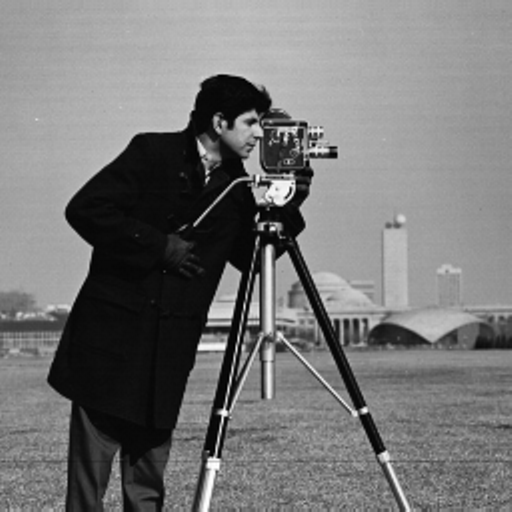

In [65]:
original_image=cv2.imread('/cameraman.tif',cv2.IMREAD_GRAYSCALE)#The image on which Steganography is done
og_image=cv2_imshow(original_image)

In [66]:
def binary(num):#converts a given decimal number to binary
  res=''
  x=8
  while(x>0):
    res=res+str(num%2)
    num=num//2
    x=x-1
  return res[::-1]

In [67]:
def decimal(stri):#converts a given binary 8 bit number to decimal
  res=0
  y=0
  for x in range(7,-1,-1):
    res=res+int(stri[x])*(2**y)
    y=y+1
  return res

In [68]:
#Converts the pixel values in the original image to binary
# Example pixel (3,7)=56 becomes 00111000
original_binary=[] # Stores the Original image where the pixel values are in Binary instead of decimal
for x in range(original_image.shape[0]):
  for y in range(original_image.shape[1]):
    original_binary.append(binary(original_image[x][y]))
original_binary=np.array(original_binary).reshape(original_image.shape[0],original_image.shape[1])

In [69]:
def edit(edited,aa):# adds aa as the last digit in a binary array
  edited=[]
  for x in range(original_image.shape[0]):
    for y in range(original_image.shape[1]):
      edited.append(binary(original_image[x][y])[0:7]+aa)
  edited=np.array(edited).reshape(original_image.shape[0],original_image.shape[1])
  return(edited)

In [70]:
def encoding(arr,a):#adds the array a which has binary to the 1st 7 digits on the binary original array
  for x in range(original_image.shape[0]):
    for y in range(original_image.shape[1]):
      arr[x][y]=str((arr[x][y])[0:7]+a[x][y])
  return arr

In [71]:
def decode(arr):#takes the LSB of the entire array and returns a binary string
  a=''
  for x in range(original_image.shape[0]):
    for y in range(original_image.shape[1]):
      a=a+(binary(arr[x][y])[-1])
  ar=''#takes 8 bits from the binary string and converts it into decimal which then converts ascii to character and returns the character string
  for x in range(0,len(a),8):
    ar=ar+str((chr(decimal(a[x:x+8]))))
  return ar

In [76]:
print("Max: ",(original_image.shape[0]*original_image.shape[1])//8," Characters")
code='It is with a heavy heart and great responsibility that I address you today regarding a matter of utmost national security. Our nation stands at a crossroads, facing a threat that cannot be ignored.Recent intelligence reports have confirmed the existence of a clandestine nuclear program within a hostile nation. Despite numerous diplomatic efforts, it is apparent that these actions pose an imminent danger to our nation and our allies.As your President, it is my solemn duty to ensure the safety and security of every American citizen. After thorough consultation with our military and intelligence agencies, I have authorized the deployment of strategic measures to neutralize this threat and protect our homeland.Please understand that this decision was not taken lightly, and every possible avenue for peaceful resolution was explored. However, in the face of such a grave threat to our national security, decisive action is necessary.'#The code to be encrypted
code=code[:(original_image.shape[0]*original_image.shape[1])//8]
l=len(code)#Stores length of code
ll=''#empty string
for x in range(original_image.shape[0]*original_image.shape[1]//8-l):
  ll=ll+' '
code=code+ll#completes the coded message to leave the rest of them as empty
last=''#Stores the code in a bianry
lasts=[]#converts stored binary into an array
for x in code:
  last=last+(binary(ord(x)))
for l in last:
  lasts.append(l)
lala=np.array(lasts).reshape(original_image.shape[0],original_image.shape[1])
divide=lala
edited=edit(original_binary,'0')#stores a binary image withouth the LSB as '0'
a=encoding(edited,divide)#add the 1st 7 bits of edited and the 8th bit is divide
hidden=[]#Stores the final result with encoded message
for x in range(original_image.shape[0]):
  for y in range(original_image.shape[1]):
    hidden.append(decimal(a[x][y]))
hidden=np.array(hidden).reshape(original_image.shape[0],original_image.shape[1])#list to array to reshape

Max:  32768  Characters


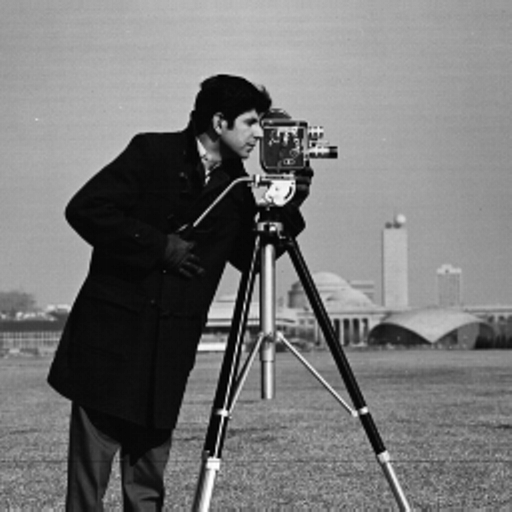

'It is with a heavy heart and great responsibility that I address you today regarding a matter of utmost national security. Our nation stands at a crossroads, facing a threat that cannot be ignored.Recent intelligence reports have confirmed the existence of a clandestine nuclear program within a hostile nation. Despite numerous diplomatic efforts, it is apparent that these actions pose an imminent danger to our nation and our allies.As your President, it is my solemn duty to ensure the safety and security of every American citizen. After thorough consultation with our military and intelligence agencies, I have authorized the deployment of strategic measures to neutralize this threat and protect our homeland.Please understand that this decision was not taken lightly, and every possible avenue for peaceful resolution was explored. However, in the face of such a grave threat to our national security, decisive action is necessary.                                                            

In [77]:
Hidden_image=cv2_imshow(hidden)
decode(hidden)